In [ ]:
"""
This module provides a BinaryConfusionMatrix class for calculating and analyzing binary confusion matrices.
Attributes:
    threshold (float): The threshold value used to determine the predicted labels.
Methods:
    __init__(self, threshold=0.5): Initializes a BinaryConfusionMatrix object with the specified threshold.
    update(self, y_trues, y_preds): Updates the confusion matrix based on the true labels and predicted labels.
    confusion_matrix(self): Returns the confusion matrix.
    tp(self): Returns the number of true positives.
    fn(self): Returns the number of false negatives.
    fp(self): Returns the number of false positives.
    tn(self): Returns the number of true negatives.
    num_samples(self): Returns the total number of samples.
    accuracy(self): Returns the accuracy of the classification.
    precision(self): Returns the precision of the classification.
    recall(self): Returns the recall of the classification.
    f1_score(self): Returns the F1 score of the classification.

"""

# %%
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
from matplotlib import pyplot as plt

In [ ]:
# %%

class utils:

    @classmethod
    def generate_multi_data(cls, n, num_classes):
        """
        随机生成多分类测试数据
        """
        y_trues = np.zeros(n, dtype=int)  # (n,)
        for i in range(num_classes):
            y_trues[i * n // num_classes : (i + 1) * n // num_classes] = i
        y_preds = np.random.rand(n, num_classes)  # (n, num_classes)
        return y_trues, y_preds

    @classmethod
    def generate_binary_data(cls, n, quality=0.5):
        """
        随机生成二分类测试数据
        """
        y_trues = np.zeros(n, dtype=int)  # (n,)
        y_trues[n // 2 :] = 1
        # 根据准确率生成预测值
        num_correct = int(n * quality)
        y_preds = np.random.rand(n)
        y_preds[: num_correct // 2] *= 0.5
        y_preds[num_correct // 2 : n // 2] *= 0.5
        y_preds[num_correct // 2 : n // 2] += 0.5

        y_preds[n // 2 : num_correct // 2 + n // 2] *= 0.5
        y_preds[n // 2 : num_correct // 2 + n // 2] += 0.5
        y_preds[num_correct // 2 + n // 2 :] *= 0.5
        return y_trues, y_preds

In [ ]:
# %%

class BinaryConfusionMatrix:
    """
    A class for calculating and analyzing binary confusion matrices.
    二分类混淆矩阵
    """

    def __init__(self, threshold=0.5):
        """
        Initializes a ConfusionMatrix object.
        初始化混淆矩阵
        Parameters:
        - threshold (float): The threshold value for classification. Default is 0.5.
        """
        # [[TN, FP],
        #  [FN, TP]]
        self.matrix = np.zeros((2, 2), dtype=int)
        self.threshold = threshold

    def update(self, y_trues, y_preds):
        """
        Update the confusion matrix based on the true labels and predicted labels.

        Parameters:
        - y_trues: 1D array of true labels, where each element is either 0 or 1.
        - y_preds: 1D array of predicted labels, where each element is a confidence score.

        Returns:
        None
        """
        y_preds = (y_preds >= self.threshold).astype(
            int
        )  # 大于等于阈值的预测为正类，否则为负类
        for t, p in zip(y_trues, y_preds):
            self.matrix[t, p] += 1

    def confusion_matrix(self):
        """
        Returns the confusion matrix.

        :return: The confusion matrix.
        :rtype: numpy.ndarray
        """
        return self.matrix

    def tn(self):
        """
        Returns the true negative value from the confusion matrix.

        Returns:
            int: The true negative value.
        """
        return self.matrix[0, 0]

    def fp(self):
        """
        Returns the number of false positives in the confusion matrix.

        Returns:
            int: The number of false positives.
        """
        return self.matrix[0, 1]

    def fn(self):
        """
        Returns the value at the position (1, 0) in the confusion matrix.

        Returns:
            int: The number of false negatives.
        """
        return self.matrix[1, 0]

    def tp(self):
        """
        Returns the true positive value from the confusion matrix.

        Returns:
            int: The true positive value.
        """
        return self.matrix[1, 1]

    def num_samples(self):
        """
        Returns the total number of samples in the confusion matrix.
        """
        return self.matrix.sum()

    def accuracy(self):
        """
        Calculates the accuracy of the classification model.

        Returns:
            float: The accuracy of the model, or None if the total number of samples is 0.
        """
        total = self.num_samples()
        correct = self.tp() + self.tn()
        if total == 0:
            return None
        return correct / total

    def precision(self):
        """
        Calculate the precision of the classifier.

        Returns:
            float or None: The precision value, or None if the denominator is zero.
        """
        denom = self.tp() + self.fp()
        if denom == 0:
            return 1.0  # 根据定义，当没有预测为正类时，精确率为1
        return self.tp() / denom

    def recall(self):
        """
        Calculate the recall metric.

        Returns:
            float: The recall value, or None if the denominator is zero.
        """
        denom = self.tp() + self.fn()
        if denom == 0:
            return None
        return self.tp() / denom

    def f1_score(self):
        """
        Calculate the F1 score.

        Returns:
            float: The F1 score, or None if precision or recall is None.
        """
        p = self.precision()
        r = self.recall()
        if p is None or r is None:
            return None
        denom = p + r
        if denom == 0:
            return None
        return 2 * p * r / denom


def plot_p_r_curve(quality: float):
    """
    绘制pr曲线
    """
    # 开启交互模式
    print(f"----------{quality=}----------")
    plt.ion()
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # 生成二分类数据并更新混淆矩阵
    n = 1000
    y_trues, y_preds = utils.generate_binary_data(n, quality)

    sk_precisions, sk_recalls, thresholds = precision_recall_curve(y_trues, y_preds)
    ax[0].plot(sk_recalls, sk_precisions)
    ax[0].set_xlabel("Recall")
    ax[0].set_ylabel("Precision")
    ax[0].set_title("Precision-Recall Curve by sklearn")
    # 绘制 precision-recall 曲线
    # thresholds = np.linspace(0.1, 1, 100)
    precisions = []
    recalls = []
    for idx, threshold in enumerate(thresholds):
        # 每个阈值下更新混淆矩阵
        cm = BinaryConfusionMatrix(threshold)
        cm.update(y_trues, y_preds)
        precisions.append(cm.precision() if cm.precision() is not None else 1)
        recalls.append(cm.recall())  # 根据我设定的数据，召回率不可能为 0

        if idx == n // 2:
            print(cm.confusion_matrix())
            print("TP:", cm.tp())
            print("FN:", cm.fn())
            print("FP:", cm.fp())
            print("TN:", cm.tn())
            print("Accuracy:", cm.accuracy())
            print("Precision:", cm.precision())
            print("Recall:", cm.recall())
            print("F1 Score:", cm.f1_score())

    sk_ap = average_precision_score(y_trues, y_preds)
    ap = compute_ap_manual(precisions, recalls)
    print(f"sklearn average_precision_score: {sk_ap}")
    print(f"my average_precision_score: {ap}")
    # print("Precision: ", end="")
    # for p in precisions:
    #     if p is not None:
    #         print(f"{p:.2f}", end=", ")
    # print()
    # print("Recall: ", end="")
    # for r in recalls:
    #     if r is not None:
    #         print(f"{r:.2f}", end=", ")
    # print()
    ax[1].plot(recalls, precisions)
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    ax[1].set_title("Precision-Recall Curve by my code, quality: " + str(quality))

    fig.tight_layout()
    fig.suptitle(f"Quality: {quality}")

    return fig


def compute_ap_with_interp(precisions, recalls):
    """
    使用插值方法手动计算 Average Precision (AP)。

    参数:
    - recall (numpy.ndarray): 召回率数组，按升序排列。
    - precision (numpy.ndarray): 精确率数组，与召回率对应。

    返回:
    - ap (float): 平均精确率。
    """
    # 插值，使精确率在每个召回率点上取最大值
    for i in range(len(precisions) - 1, 0, -1):
        if precisions[i] > precisions[i - 1]:
            precisions[i - 1] = precisions[i]

    # 添加 (0, p0) 点
    recalls = np.concatenate(([0.0], recalls))
    precisions = np.concatenate(([precisions[0]], precisions))

    # 计算 AP
    ap = np.sum((recalls[1:] - recalls[:-1]) * precisions[1:])
    return ap


def compute_ap_manual(precisions, recalls):
    """
    计算 Average Precision (AP) 基于 Precision-Recall 曲线，使用梯形法则。

    参数:
    - recall (numpy.ndarray): 召回率数组。
    - precision (numpy.ndarray): 精确率数组。

    返回:
    - ap (float): 平均精确率。
    """
    # 确保 Recall 是升序排列
    if recalls[0] > recalls[-1]:
        recalls = np.flip(recalls)
        precisions = np.flip(precisions)

    # 使用梯形法则计算面积
    ap = np.trapz(precisions, recalls)
    return ap


def save_combined_fig(figs, filename):
    """
    将多个fig对象拼接在一起并保存为一个图像文件
    """
    # 计算总的行数和列数
    n = len(figs)
    cols = 2
    rows = (n + 1) // cols

    # 创建一个新的大图形
    combined_fig, combined_ax = plt.subplots(rows, cols, figsize=(12, 6 * rows))

    for i, fig in enumerate(figs):
        # 将每个fig的内容绘制到新的大图形的子图中
        for j, ax in enumerate(fig.axes):
            row = i // cols
            col = i % cols
            combined_ax[row, col].plot(ax.lines[0].get_xdata(), ax.lines[0].get_ydata())
            combined_ax[row, col].set_title(ax.get_title())
            combined_ax[row, col].set_xlabel(ax.get_xlabel())
            combined_ax[row, col].set_ylabel(ax.get_ylabel())

    combined_fig.tight_layout()
    combined_fig.savefig(filename)

----------quality=0.5----------
[[250 250]
 [250 250]]
TP: 250
FN: 250
FP: 250
TN: 250
Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1 Score: 0.5
sklearn average_precision_score: 0.5005251139664593
my average_precision_score: 0.49726148245604396
----------quality=0.6----------
[[300 200]
 [200 300]]
TP: 300
FN: 200
FP: 200
TN: 300
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1 Score: 0.6
sklearn average_precision_score: 0.5900905477973983
my average_precision_score: 0.5882944622462607
----------quality=0.7----------
[[350 150]
 [150 350]]
TP: 350
FN: 150
FP: 150
TN: 350
Accuracy: 0.7
Precision: 0.7
Recall: 0.7
F1 Score: 0.7
sklearn average_precision_score: 0.6588034936157027
my average_precision_score: 0.6554193122015483
----------quality=0.8----------
[[400 100]
 [100 400]]
TP: 400
FN: 100
FP: 100
TN: 400
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002
sklearn average_precision_score: 0.7892605505609424
my average_precision_score: 0.7866136548144969
----------quality=0.

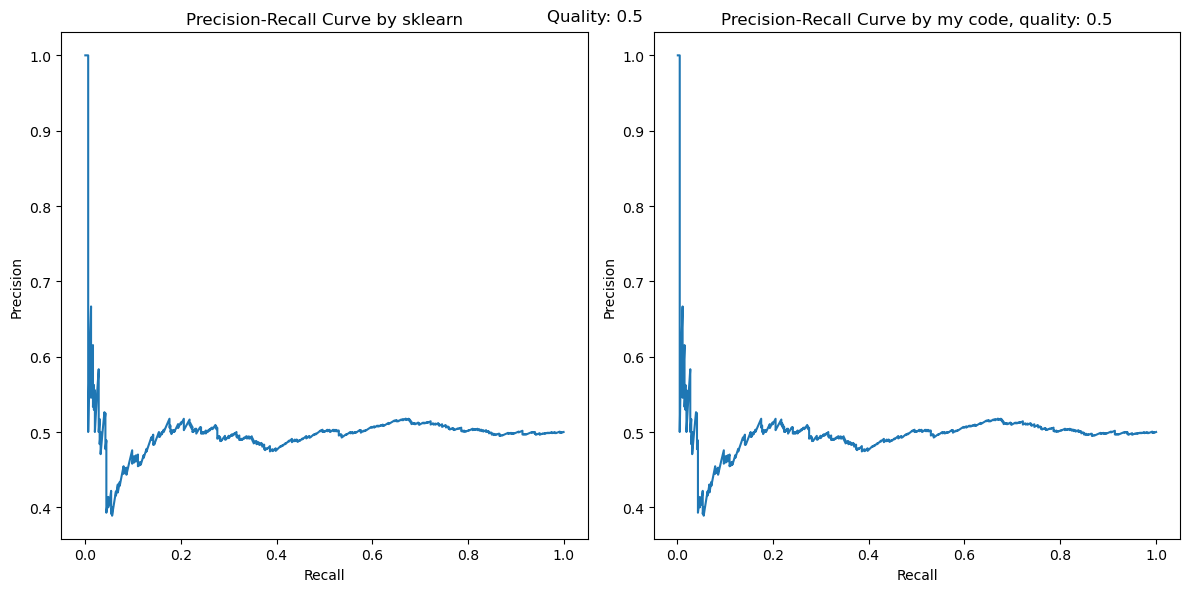

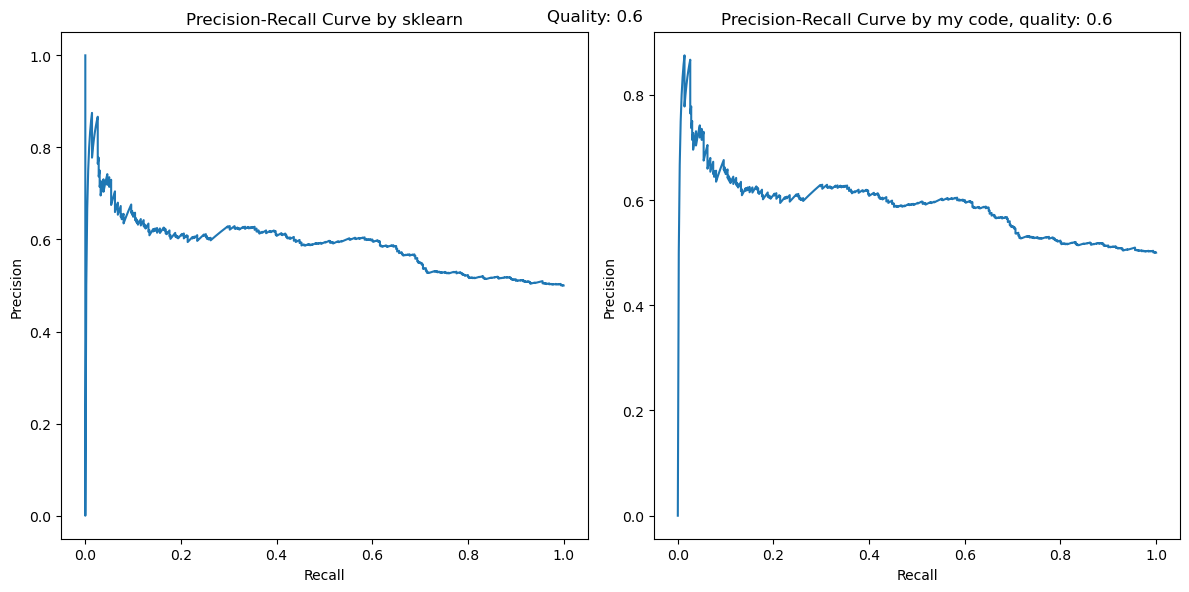

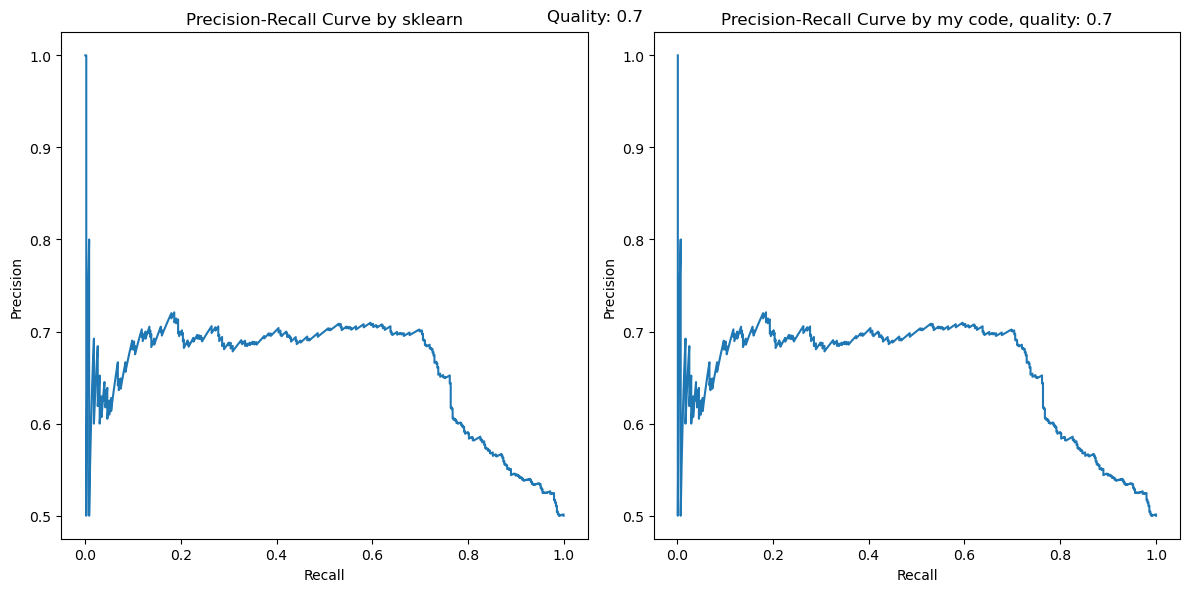

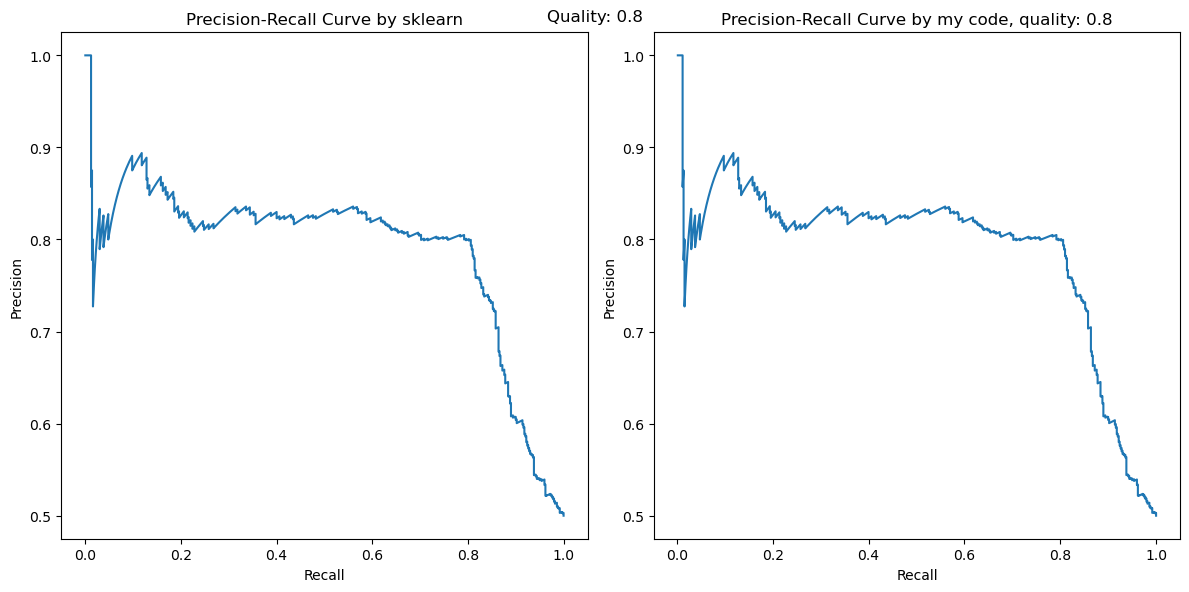

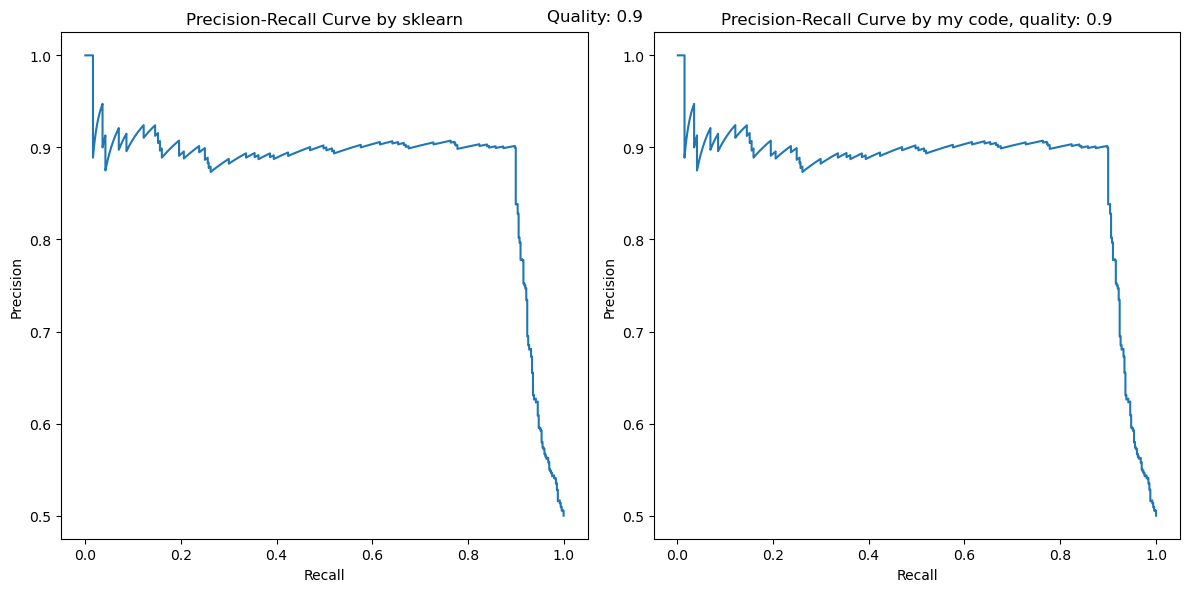

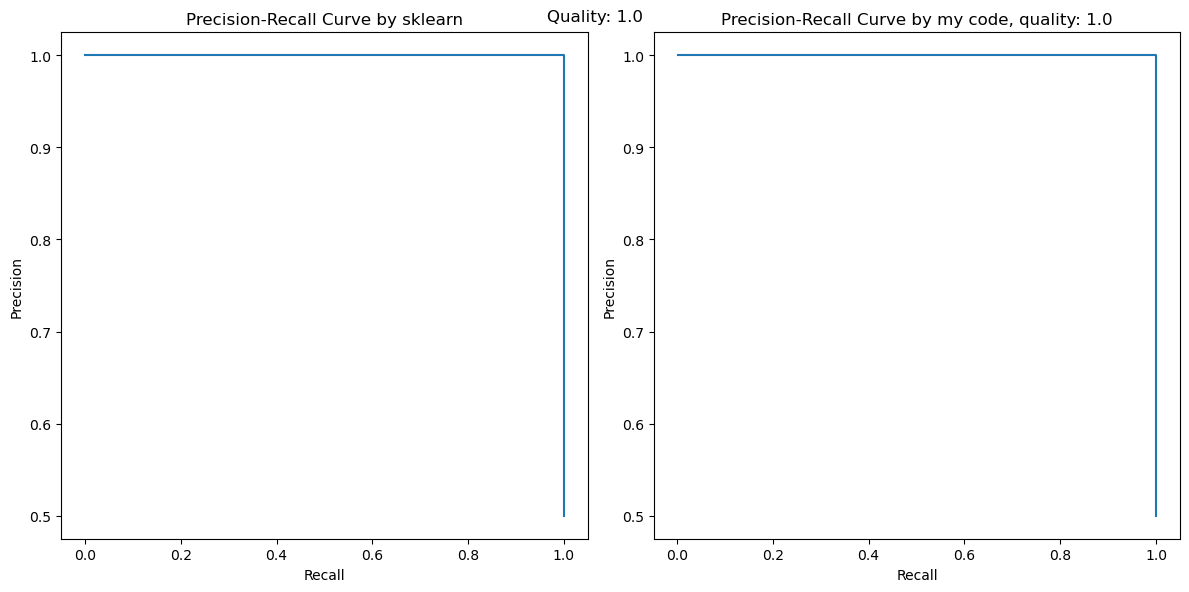

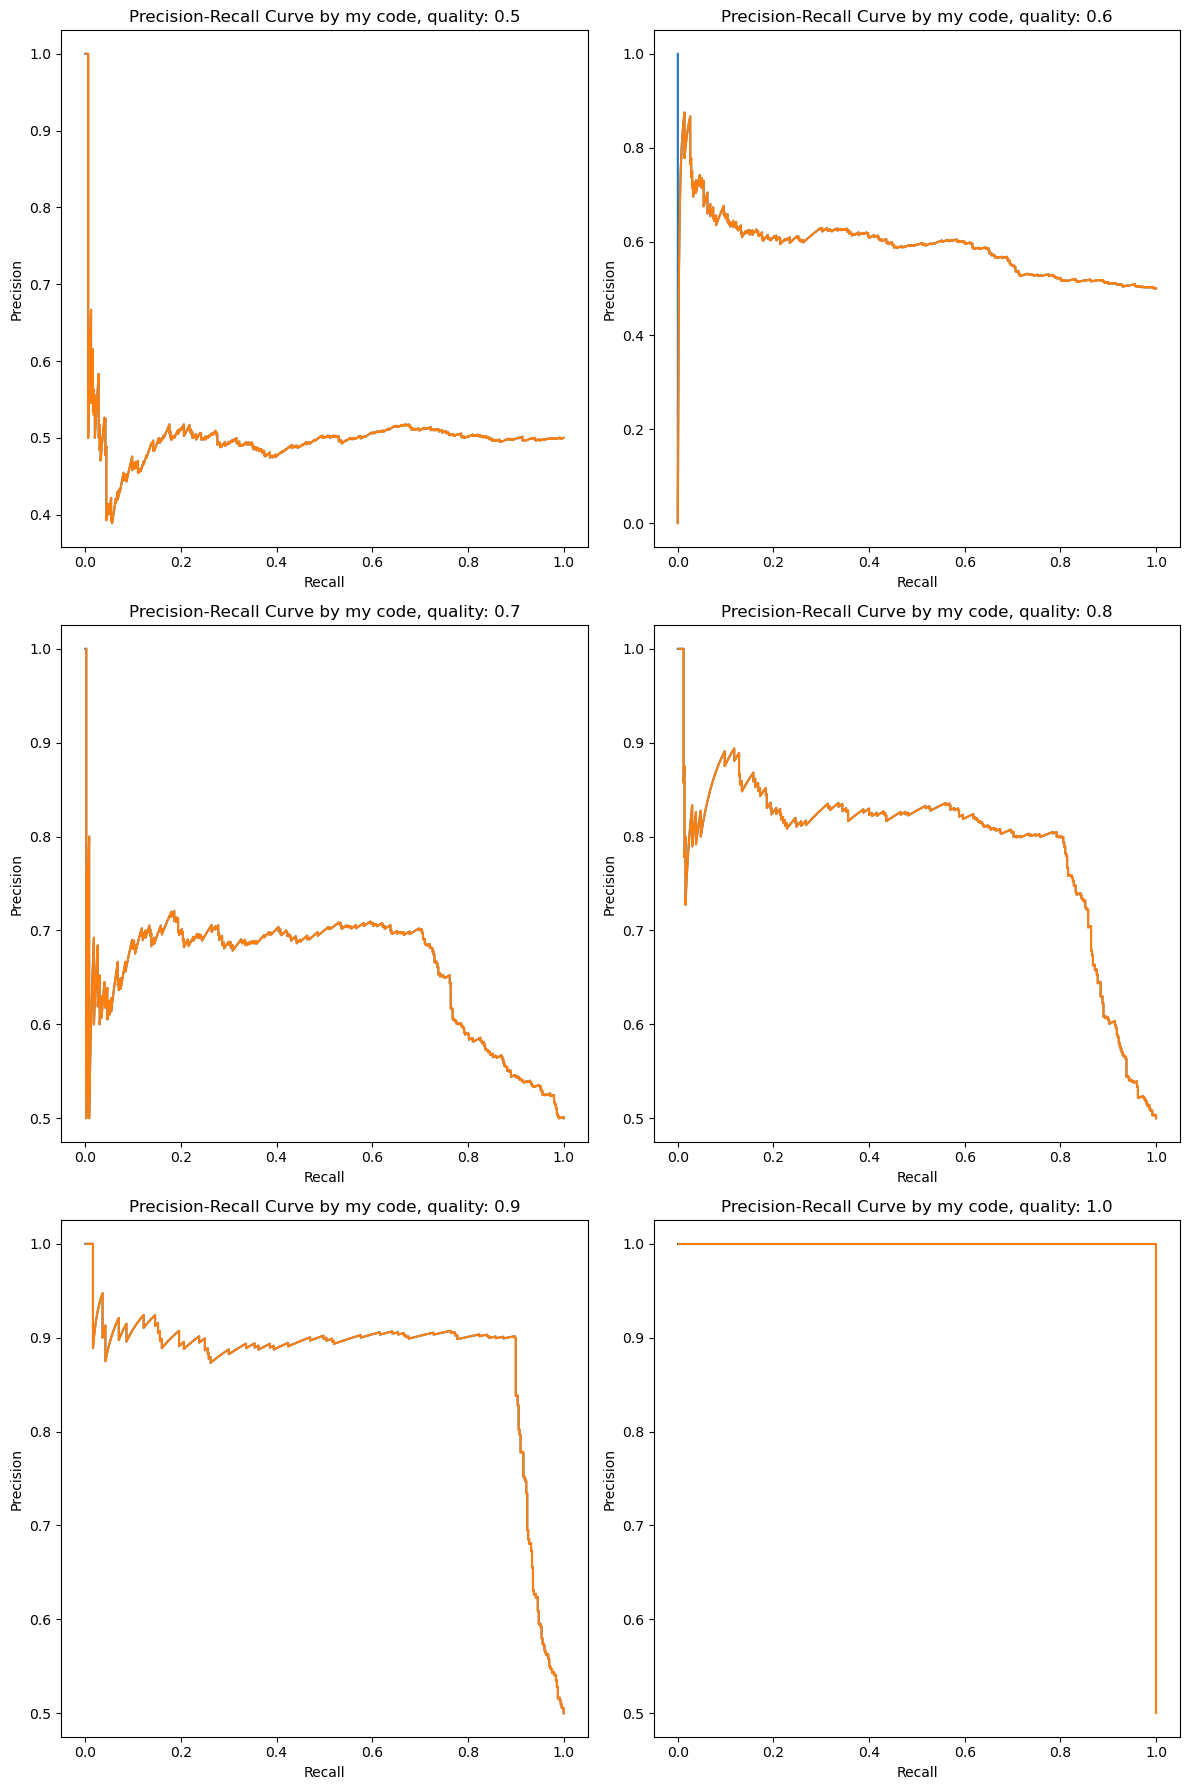

In [ ]:
# %%

if __name__ == "__main__":
    qualities = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    figs = [plot_p_r_curve(q) for q in qualities]
    save_combined_fig(figs, "pr_curves.png")

    # AP =0.5，表明模型的预测结果是随机的
    # AP =1，表明模型的预测结果是完美的。
    # 当 AP = 1 时，有一个阈值使得所有的预测都是正确的，即召回率和精确率都是 1。